In [1]:
import numpy as np
import pandas as pd
import time as time
import operator
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image, clear_output
from scipy.spatial.distance import pdist, squareform

In [18]:
filepath = '/Users/alfredogarbuno/github-repos/hashcode-2015/data/learn_and_teach.in'
f = open(filepath, "r+")
dimstr = f.readline().split()
paint = np.empty([int(dimstr[0]), int(dimstr[1])])

for i in range(int(dimstr[0])):
    paint[i] = np.array(list(f.readline().split()[0].replace(".", "0").replace("#", "1")), np.int32)
    
f.close()

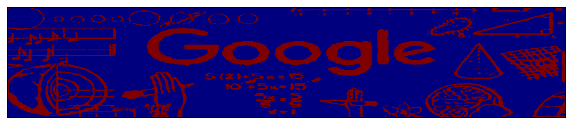

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(paint)
fig = plt.gca()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [20]:
dim = np.array(dimstr, np.int32)
print dim

[158 800]


In [21]:
density = paint.sum() / dim.prod()
print density

0.205767405063


In [22]:
minsize = int(dim.min() * density)
# minsize = 1
print minsize

32


In [23]:
indices = np.arange(1,dim.prod()+1).reshape(dim)
print indices

[[     1      2      3 ...,    798    799    800]
 [   801    802    803 ...,   1598   1599   1600]
 [  1601   1602   1603 ...,   2398   2399   2400]
 ..., 
 [124001 124002 124003 ..., 124798 124799 124800]
 [124801 124802 124803 ..., 125598 125599 125600]
 [125601 125602 125603 ..., 126398 126399 126400]]


In [24]:
# Generate the indices, in the test example we can only have sqp(1) so we lose 2 rows and 2 columns, first and last 
# in both cases.
row, col = np.indices((dim[0]-2*minsize, dim[1]-2*minsize))
centers = indices[row+minsize, col+minsize]
centers

array([[ 25633,  25634,  25635, ...,  26366,  26367,  26368],
       [ 26433,  26434,  26435, ...,  27166,  27167,  27168],
       [ 27233,  27234,  27235, ...,  27966,  27967,  27968],
       ..., 
       [ 98433,  98434,  98435, ...,  99166,  99167,  99168],
       [ 99233,  99234,  99235, ...,  99966,  99967,  99968],
       [100033, 100034, 100035, ..., 100766, 100767, 100768]])

In [25]:
# Test case, let's take the center in cell 9
# We access that center by knowing it is in the second row, so the first row in the center matrix
# And we know that it is the first column

def discrete_kernel(center, minsize):
    dist = np.empty((2*minsize+1,2*minsize+1))
    decay = np.logspace(0,1,minsize+1 )
    
    for xstep in range(-minsize,minsize+1):
        for ystep in range(-minsize,minsize+1):
            dist[1+xstep][1+ystep] = 1 * paint[center[0]+xstep][center[1]+ystep]
            
    return (dist.sum()+0.0)/np.array(dist.shape).prod()

In [ ]:
# Computes the densities of zeroes for every possible center
cands = []
cands = [ (ycoord, discrete_kernel([row+minsize, ycoord%dim[1]-1], minsize)) for row in range(centers.shape[0]) 
        for ycoord in centers[row]]
print len(cands)

In [ ]:
# Given a threshold filter the centers most probable to a successful square paint
threshold = 0.6

cands = [(key, value) for (key,value) in cands if value > threshold]
cands = sorted(cands, key=lambda element: (-element[1], element[0]))
#cands = sorted(cands, key=operator.itemgetter( 1))
#cands.reverse()

In [ ]:
print len(cands)

In [ ]:
def paint_square(center, minsize):
    for xstep in range(-minsize,minsize+1):
        for ystep in range(-minsize,minsize+1):
            paint[center[0]+xstep][center[1]+ystep] = 0.0

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(paint)
fig = plt.gca()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [15]:
cands[0][0]

3834

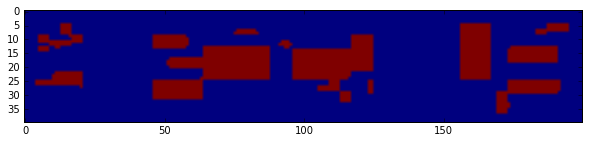

In [16]:
fig=plt.figure()
n = len(cands)
i = 0
paints = 1
plt.figure(figsize=(10,10))
plt.imshow(paint)
clear_output(wait=True)
display(plt.gcf())
time.sleep(2)

for cand in cands:
    center = ( cand[0] // dim[1], cand[0] % dim[1] - 1)
    if cand[0] == cands[0][0]:
        paint_square(center, minsize)
        plt.imshow(paint)
        clear_output(wait=True)
        display(plt.gcf())
        time.sleep(1)
    else:
        if discrete_kernel(center, minsize) > threshold:
            paint_square(center, minsize)
            paints += 1
            plt.imshow(paint)
            clear_output(wait=True)
            display(plt.gcf())
            time.sleep(0.001)
            
clear_output(wait=True)

In [17]:
paints

2